### 4.10 TASK PART 1B ###

 ## 5. Customer profiling
 ## 6. Visualization for distribution of profiles
 ## 7. Aggregation of customer profiles
 ## 8. Analysis by regions
 ## 9. Visualizations

# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Create path to main folder

In [3]:
path = r'C:\Users\João Pedro\MAR-Instacart Basket Analysis'

In [4]:
path

'C:\\Users\\João Pedro\\MAR-Instacart Basket Analysis'

# Import data 

In [5]:
df = pd.read_pickle(os.path.join(path, '02 Data' , 'Prepared Data' , 'df_part1.pkl'))

In [6]:
df.columns

Index(['user_id', 'product_id', 'product_name', 'aisle_id', 'department_id',
       'prices', 'order_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_order',
       'add_to_cart_order', 'reordered', '_merge', 'price_range_loc',
       'busiest_day', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'mean_product_price', 'spending_flag',
       'median_days_between_orders', 'order_frequency', 'gender', 'State',
       'age', 'date_joined', 'dependants', 'family_status', 'income', 'exist',
       'region', 'exclusion_flag'],
      dtype='object')

 ## 5. Customer profiling

 #  Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. #

# Check dataframe columns 

In [7]:
df['income'].describe()

count    2.441488e+07
mean     9.989505e+04
std      4.333357e+04
min      2.590300e+04
25%      6.752400e+04
50%      9.683600e+04
75%      1.281600e+05
max      5.939010e+05
Name: income, dtype: float64

In [8]:
df['age'].describe()

count    2.441488e+07
mean     4.945734e+01
std      1.848532e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

 # For analytical purposes, the following classification is applied:

Income is categorized into four groups based on income quartiles. Individuals in the first quartile fall under the low-income category (< $67,004), followed by the low-middle-income group ($67,004 to $96,618), then the upper-middle-income group ($96,618 to $127,912), and finally, those in the highest quartile (> $127,912) are classified as belonging to the upper-income bracket.

Age is classified as follows: individuals below 30 years old are categorized as young adults, those between 30 and 65 years old are considered adults, and individuals above 65 years old are labeled as seniors. Consequently, the following customer profiles are establis

1. low-income, young adult2. 
low-income, adult3. 
low-income, senio4. r
lower-middle income, young adu5. lt
lower-middle income, ad6. ult
lower-middle income, se7. nior
upper-middle income, young 8. adult
upper-middle income,9.  adult
upper-middle income,10.  senior
high-income, you11. ng adult
high-inco12. me, adult
high-inc me, senior
hed:

# Create the customer profiles 

# Define low-income, young adult group

In [9]:
df.loc[(df['age'] < 30) & (df['income'] < 67004), 'customer_profile'] = 'low-income, young adult'

# Define low-income, adult group

In [10]:
df.loc[(df['age'] >= 30) & (df['age'] < 65) & (df['income'] < 67004) , 'customer_profile'] = 'low-income, adult'

# Define low-income, senior group

In [11]:
df.loc[(df['age'] >= 65) & (df['income'] < 67004), 'customer_profile'] = 'low-income, senior'

# Define lower-middle income, young adult group

In [12]:
df.loc[(df['age'] < 30) & (df['income'] >= 67004) & (df['income'] < 96618), 'customer_profile'] = 'lower-middle income, young adult'

# Define upper-middle income, adult group

In [13]:
df.loc[(df['age'] >= 30) & (df['age'] < 65) & (df['income'] >= 67004) & (df['income'] < 96618), 'customer_profile'] = 'lower-middle income, adult'

# Define lower-middle income, senior group

In [14]:
df.loc[(df['age'] >= 65) & (df['income'] >= 67004) & (df['income'] < 96618), 'customer_profile'] = 'lower-middle income, senior'

# Define upper-middle income, young adult group

In [15]:
df.loc[(df['age'] < 30) & (df['income'] >= 96618) & (df['income'] < 127912), 'customer_profile'] = 'upper-middle income, young adult'

# Define upper-middle income, adult group

In [16]:
df.loc[(df['age'] >= 30) & (df['age'] < 65) & (df['income'] >= 96618) & (df['income'] < 127912), 'customer_profile'] = 'upper-middle income, adult'

# Define upper-middle income, senior group

In [17]:
df.loc[(df['age'] >= 65) & (df['income'] >= 96618) & (df['income'] < 127912), 'customer_profile'] = 'upper-middle income, senior'

# Define high-income, young adult group

In [18]:
df.loc[(df['age'] < 30) & (df['income'] >= 127912), 'customer_profile'] = 'high-income, young adult'

# Define high-income, adult group

In [19]:
df.loc[(df['age'] >= 30) & (df['age'] < 65) & (df['income'] >= 127912), 'customer_profile'] = 'high-income, adult'

# Define high-income, senior group

In [20]:
df.loc[(df['age'] >= 65) & (df['income'] >= 127912), 'customer_profile'] = 'high-income, senior'

# The customer profiles outlined above can be cross-tabulated with the number of dependents in each customer group as follows: 

# Crosstab indicating proportion of number of dependents in each customer profile

In [21]:
crosstab_proportion_ndependents = pd.crosstab(df['customer_profile'], df['dependants'], normalize = 'index')

In [22]:
crosstab_proportion_ndependents

dependants,0,1,2,3
customer_profile,,,,
"high-income, adult",0.256774,0.247724,0.245811,0.249691
"high-income, senior",0.245499,0.244771,0.255853,0.253877
"high-income, young adult",0.203151,0.262793,0.278747,0.255309
"low-income, adult",0.254789,0.244368,0.251625,0.249219
"low-income, senior",0.235693,0.261690,0.252166,0.250451
"low-income, young adult",0.246467,0.251071,0.246145,0.256316
"lower-middle income, adult",0.245996,0.252864,0.247664,0.253476
"lower-middle income, senior",0.250040,0.243434,0.262774,0.243752
"lower-middle income, young adult",0.249577,0.253970,0.247145,0.249308


 # An equal distribution of the number of dependents appears to be present across the various customer profiles #

# 6. Visualization for distribution of profiles

In [23]:
df['customer_profile'].value_counts()

customer_profile
high-income, adult                  3595029
upper-middle income, adult          3544536
lower-middle income, adult          3131341
low-income, adult                   3095261
high-income, senior                 2488216
upper-middle income, senior         2282205
lower-middle income, young adult    2147184
low-income, young adult             2082053
lower-middle income, senior          877734
low-income, senior                   810295
upper-middle income, young adult     305173
high-income, young adult              55850
Name: count, dtype: int64

# Create a horizontal bar chart to visualize the distribution of customer profiles

Text(0.5, 1.0, 'Relation Between Income and Customer Profile')

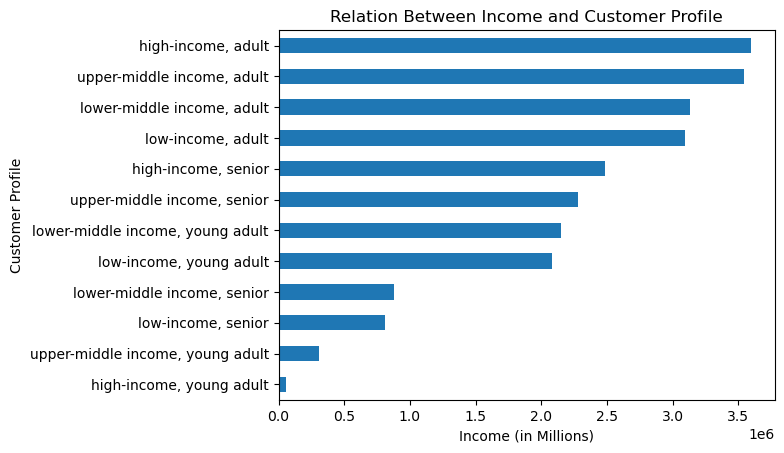

In [24]:
bar_customerprofile = df['customer_profile'].value_counts().sort_values().plot(kind='barh')
bar_customerprofile.set_xlabel('Income (in Millions)')
bar_customerprofile.set_ylabel('Customer Profile')
bar_customerprofile.set_title('Relation Between Income and Customer Profile')

# The visualization clearly illustrates that the highest proportion belongs to the high-income adult group, whereas the lowest proportion pertains to the high-income young adult group, possibly indicating that achieving a high income requires time. Conversely, regardless of income, the adult age group constitutes the top customers of Instacart. #

# Export Chart

In [25]:
bar_customerprofile.figure.savefig(os.path.join(path,'04 Analysis' , 'Visualizations' , 'bar_customerprofile.png'))

  ## 7. Aggregation of customer profiles

# Create crossbar  mean, min and max values of usage frequency of customer profiles

In [26]:
customers_usage_frequency = df.groupby('customer_profile').agg({'days_since_prior_order': ['mean' , 'min' , 'max']})

In [27]:
customers_usage_frequency

days_since_prior_order           
                                                   mean  min   max
customer_profile                                                  
high-income, adult                            10.067508  0.0  30.0
high-income, senior                           10.004289  0.0  30.0
high-income, young adult                       9.420161  0.0  30.0
low-income, adult                             10.185615  0.0  30.0
low-income, senior                            10.321906  0.0  30.0
low-income, young adult                       10.193614  0.0  30.0
lower-middle income, adult                    10.037629  0.0  30.0
lower-middle income, senior                    9.909195  0.0  30.0
lower-middle income, young adult              10.004431  0.0  30.0
upper-middle income, adult                    10.051700  0.0  30.0
upper-middle income, senior                   10.134371  0.0  30.0
upper-middle income, young adult              10.275142  0.0  30.0

# Create crossbar mean, min and max values of expenditure of customer profiles

In [28]:
customers_expenditure = df.groupby('customer_profile').agg({'prices':['mean', 'min' , 'max']})

In [29]:
customers_expenditure

prices              
                                        mean  min      max
customer_profile                                          
high-income, adult                 20.842343  1.0  99999.0
high-income, senior                16.903986  1.0  99999.0
high-income, young adult          281.996038  1.0  99999.0
low-income, adult                   7.278045  1.0  14900.0
low-income, senior                  6.709261  1.0     25.0
low-income, young adult             7.600615  1.0  14900.0
lower-middle income, adult          8.661349  1.0  99999.0
lower-middle income, senior         8.766952  1.0  99999.0
lower-middle income, young adult    8.859249  1.0  99999.0
upper-middle income, adult          9.374225  1.0  99999.0
upper-middle income, senior         8.707137  1.0  99999.0
upper-middle income, young adult   17.442318  1.0  99999.0

## 8. Analysis by regions

# 8.1. Northeast region

# Create subset of the dataframe for the Northeast region

In [30]:
df_ne = df[df['region'] == 'Northeast']

# Count the customers in the region

In [31]:
df_ne['user_id'].value_counts().sum()

4315271

# 8.1.1. Demographic outlook

# Check customer profile in region

In [32]:
df_ne['customer_profile'].value_counts()

customer_profile
upper-middle income, adult          632369
high-income, adult                  622255
low-income, adult                   550405
lower-middle income, adult          521727
high-income, senior                 458112
upper-middle income, senior         409439
lower-middle income, young adult    400178
low-income, young adult             359069
lower-middle income, senior         157370
low-income, senior                  151958
upper-middle income, young adult     44806
high-income, young adult              7583
Name: count, dtype: int64

# Check family status in region

In [33]:
df_ne['family_status'].value_counts()

family_status
married                             3045202
single                               684778
divorced/widowed                     380360
living with parents and siblings     204931
Name: count, dtype: int64

# Check number of dependents in region

In [34]:
df_ne['dependants'].value_counts()

dependants
3    1094308
1    1087111
2    1068714
0    1065138
Name: count, dtype: int64

# 8.1.2. Spending habits

# Check stats for spendings in region

In [35]:
df_ne['prices'].describe()

count    4.315271e+06
mean     1.129023e+01
std      4.473718e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.120000e+01
max      9.999900e+04
Name: prices, dtype: float64

# Check customers spending habits in region

In [36]:
df_ne['spending_flag'].value_counts(dropna = False)

spending_flag
Low spender     4232654
High spender      82617
Name: count, dtype: int64

 # Check proportion of customer spending habits by customer profile

In [37]:
ne_spendinghabits = pd.crosstab(df_ne['customer_profile'], df_ne['spending_flag'], normalize = 'index')
ne_spendinghabits

spending_flag,High spender,Low spender
customer_profile,,
"high-income, adult",0.061075,0.938925
"high-income, senior",0.035212,0.964788
"high-income, young adult",1.000000,0.000000
"low-income, adult",0.001544,0.998456
"low-income, senior",0.000000,1.000000
"low-income, young adult",0.002331,0.997669
"lower-middle income, adult",0.006975,0.993025
"lower-middle income, senior",0.004887,0.995113
"lower-middle income, young adult",0.010308,0.989692


# Check preferences of customers spending range of prices in region 

In [38]:
ne_prefcustomersrange = pd.crosstab(df_ne['customer_profile'], df_ne['price_range_loc'], normalize = 'index')
ne_prefcustomersrange

price_range_loc,High-range product,Low-range product,Mid-range product
customer_profile,,,
"high-income, adult",0.014554,0.300051,0.685396
"high-income, senior",0.014494,0.294240,0.691265
"high-income, young adult",0.020177,0.313860,0.665963
"low-income, adult",0.008614,0.361376,0.630011
"low-income, senior",0.005212,0.407803,0.586985
"low-income, young adult",0.010767,0.332167,0.657066
"lower-middle income, adult",0.013212,0.296180,0.690608
"lower-middle income, senior",0.013300,0.301601,0.685099
"lower-middle income, young adult",0.012942,0.300979,0.686080


# 8.1.3. Ordering habits

# Order stats by region

In [39]:
df_ne['median_days_between_orders'].describe()

count    4.315271e+06
mean     8.923366e+00
std      5.776320e+00
min      0.000000e+00
25%      5.000000e+00
50%      7.000000e+00
75%      1.100000e+01
max      3.000000e+01
Name: median_days_between_orders, dtype: float64

# Customer ordering habits

In [40]:
df_ne['order_frequency'].value_counts(dropna=False)

order_frequency
Frequent customer        3204565
Regular customer          860198
Non-frequent customer     250508
Name: count, dtype: int64

# Profile of active customers

In [41]:
ne_activity = pd.crosstab(df_ne['customer_profile'], df_ne['order_frequency'], normalize = 'index')
ne_activity

order_frequency,Frequent customer,Non-frequent customer,Regular customer
customer_profile,,,
"high-income, adult",0.731422,0.061314,0.207264
"high-income, senior",0.764870,0.046853,0.188277
"high-income, young adult",0.776606,0.019781,0.203613
"low-income, adult",0.733563,0.064182,0.202255
"low-income, senior",0.749740,0.070934,0.179326
"low-income, young adult",0.736552,0.061364,0.202084
"lower-middle income, adult",0.730392,0.061022,0.208586
"lower-middle income, senior",0.766105,0.058995,0.174900
"lower-middle income, young adult",0.767696,0.051115,0.181189


# 8.1.4. Brand loyalty

# Stats by loyalty in the region

In [42]:
df_ne['max_order'].describe()

count    4.315271e+06
mean     3.865876e+01
std      2.499140e+01
min      5.000000e+00
25%      1.900000e+01
50%      3.300000e+01
75%      5.300000e+01
max      9.900000e+01
Name: max_order, dtype: float64

# Customer brand loyalty

In [43]:
df_ne['loyalty_flag'].value_counts(dropna=False)

loyalty_flag
Regular customer    2234113
Loyal customer      1710886
New customer         370272
Name: count, dtype: int64

# Brand loyalty by customer profile

In [44]:
ne_brand = pd.crosstab(df_ne['customer_profile'], df_ne['loyalty_flag'], normalize = 'index')
ne_brand

loyalty_flag,Loyal customer,New customer,Regular customer
customer_profile,,,
"high-income, adult",0.376185,0.086884,0.536931
"high-income, senior",0.427699,0.082654,0.489647
"high-income, young adult",0.491626,0.068706,0.439668
"low-income, adult",0.388132,0.092734,0.519134
"low-income, senior",0.402473,0.099883,0.497644
"low-income, young adult",0.393456,0.089665,0.516878
"lower-middle income, adult",0.365743,0.088928,0.545329
"lower-middle income, senior",0.453041,0.078814,0.468145
"lower-middle income, young adult",0.415445,0.077768,0.506787


# 8.1.5. Product preferences

# Highest frequency departments by region

In [45]:
df_ne['department_id'].value_counts(dropna = False).head(10)

department_id
4     1269360
16     729754
19     389733
7      367868
1      283259
13     243728
3      157635
20     139553
15     137950
9      110708
Name: count, dtype: int64

# Most popular products 

In [46]:
df_ne['product_name'].value_counts(dropna=False).head(10)

product_name
Banana                    63398
Bag of Organic Bananas    53545
Organic Strawberries      35818
Organic Baby Spinach      32368
Organic Hass Avocado      30013
Organic Avocado           22614
Large Lemon               20794
Organic Whole Milk        19805
Organic Raspberries       19723
Strawberries              18856
Name: count, dtype: int64

# Less popular products

In [47]:
df_ne['product_name'].value_counts(dropna=False).tail(10)

product_name
Waffeletten Milk Fine European Biscuits                              1
Minis, Vanilla                                                       1
Mango Mango Fruit Puree & Juice Blend 100% Organic Fruit Smoothie    1
Body Bar Soap Milk & Honey Complexion                                1
Taco Night Blend                                                     1
Salted Almond Chocolate Bar                                          1
Number 4 Vim and Vigor Cold-Pressed Juice                            1
Wrigley's 5 React2 Unique Mint Sugar-Free Gum                        1
Classic Vegetables Crinkle Cut Carrots                               1
Citron Vodka                                                         1
Name: count, dtype: int64

# 8.2. Midwest region

# Create subset of the dataframe for the Midewest region

In [48]:
df_mw = df[df['region'] == 'Midwest']

# Count the customers in the region

In [49]:
df_mw['user_id'].value_counts().sum()

5711756

# 8.2.1. Demographic outlook

# Check customer profile in region

In [50]:
df_mw['customer_profile'].value_counts()

customer_profile
high-income, adult                  873489
upper-middle income, adult          848009
low-income, adult                   721424
lower-middle income, adult          707850
high-income, senior                 575095
upper-middle income, senior         538439
lower-middle income, young adult    496120
low-income, young adult             479058
lower-middle income, senior         200167
low-income, senior                  179051
upper-middle income, young adult     79688
high-income, young adult             13366
Name: count, dtype: int64

# Check family status in region

In [51]:
df_mw['family_status'].value_counts()

family_status
married                             3998815
single                               951799
divorced/widowed                     485162
living with parents and siblings     275980
Name: count, dtype: int64

# Check number of dependents in region

In [52]:
df_mw['dependants'].value_counts()

dependants
1    1454448
0    1436961
2    1419131
3    1401216
Name: count, dtype: int64

# 8.2.2. Spending habits

# Check stats for spendings in region

In [53]:
df_mw['prices'].describe()

count    5.711756e+06
mean     1.290103e+01
std      5.803481e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

# Check customers spending habits in region

In [54]:
df_mw['spending_flag'].value_counts(dropna = False)

spending_flag
Low spender     5592548
High spender     119208
Name: count, dtype: int64

# Check proportion of customer spending habits by customer profile

In [55]:
mw_spendinghabits = pd.crosstab(df_ne['customer_profile'], df_ne['spending_flag'], normalize = 'index')
mw_spendinghabits

spending_flag,High spender,Low spender
customer_profile,,
"high-income, adult",0.061075,0.938925
"high-income, senior",0.035212,0.964788
"high-income, young adult",1.000000,0.000000
"low-income, adult",0.001544,0.998456
"low-income, senior",0.000000,1.000000
"low-income, young adult",0.002331,0.997669
"lower-middle income, adult",0.006975,0.993025
"lower-middle income, senior",0.004887,0.995113
"lower-middle income, young adult",0.010308,0.989692


# Check preferences of customers spending range of prices in region 

In [56]:
mw_prefcustomersrange = pd.crosstab(df_ne['customer_profile'], df_ne['price_range_loc'], normalize = 'index')
mw_prefcustomersrange

price_range_loc,High-range product,Low-range product,Mid-range product
customer_profile,,,
"high-income, adult",0.014554,0.300051,0.685396
"high-income, senior",0.014494,0.294240,0.691265
"high-income, young adult",0.020177,0.313860,0.665963
"low-income, adult",0.008614,0.361376,0.630011
"low-income, senior",0.005212,0.407803,0.586985
"low-income, young adult",0.010767,0.332167,0.657066
"lower-middle income, adult",0.013212,0.296180,0.690608
"lower-middle income, senior",0.013300,0.301601,0.685099
"lower-middle income, young adult",0.012942,0.300979,0.686080


# 8.2.3. Ordering habits

# Order stats by region

In [57]:
df_mw['median_days_between_orders'].describe()

count    5.711756e+06
mean     9.015581e+00
std      5.798473e+00
min      0.000000e+00
25%      5.000000e+00
50%      7.000000e+00
75%      1.100000e+01
max      3.000000e+01
Name: median_days_between_orders, dtype: float64

# Customer ordering habits

In [58]:
df_mw['order_frequency'].value_counts(dropna=False)

order_frequency
Frequent customer        4213478
Regular customer         1148124
Non-frequent customer     350154
Name: count, dtype: int64

# Profile of active customers

In [59]:
mw_activity = pd.crosstab(df_ne['customer_profile'], df_ne['order_frequency'], normalize = 'index')
mw_activity

order_frequency,Frequent customer,Non-frequent customer,Regular customer
customer_profile,,,
"high-income, adult",0.731422,0.061314,0.207264
"high-income, senior",0.764870,0.046853,0.188277
"high-income, young adult",0.776606,0.019781,0.203613
"low-income, adult",0.733563,0.064182,0.202255
"low-income, senior",0.749740,0.070934,0.179326
"low-income, young adult",0.736552,0.061364,0.202084
"lower-middle income, adult",0.730392,0.061022,0.208586
"lower-middle income, senior",0.766105,0.058995,0.174900
"lower-middle income, young adult",0.767696,0.051115,0.181189


# 8.2.4. Brand loyalty

# Stats by loyalty in the region

In [60]:
df_mw['max_order'].describe()

count    5.711756e+06
mean     3.795887e+01
std      2.471938e+01
min      5.000000e+00
25%      1.800000e+01
50%      3.200000e+01
75%      5.100000e+01
max      9.900000e+01
Name: max_order, dtype: float64

# Customer brand loyalty

In [61]:
df_mw['loyalty_flag'].value_counts(dropna=False)

loyalty_flag
Regular customer    3007553
Loyal customer      2204617
New customer         499586
Name: count, dtype: int64

# Brand loyalty by customer profile

In [62]:
mw_brand = pd.crosstab(df_ne['customer_profile'], df_ne['loyalty_flag'], normalize = 'index')
mw_brand

loyalty_flag,Loyal customer,New customer,Regular customer
customer_profile,,,
"high-income, adult",0.376185,0.086884,0.536931
"high-income, senior",0.427699,0.082654,0.489647
"high-income, young adult",0.491626,0.068706,0.439668
"low-income, adult",0.388132,0.092734,0.519134
"low-income, senior",0.402473,0.099883,0.497644
"low-income, young adult",0.393456,0.089665,0.516878
"lower-middle income, adult",0.365743,0.088928,0.545329
"lower-middle income, senior",0.453041,0.078814,0.468145
"lower-middle income, young adult",0.415445,0.077768,0.506787


# 8.2.5. Product preferences

# Highest frequency departments by region

In [63]:
df_mw['department_id'].value_counts(dropna = False).head(10)

department_id
4     1695851
16     962300
19     509148
7      472243
1      381094
13     326376
3      205374
15     184194
20     182735
9      148529
Name: count, dtype: int64

# Most popular products 

In [64]:
df_mw['product_name'].value_counts(dropna=False).head(10)

product_name
Banana                    83575
Bag of Organic Bananas    71369
Organic Strawberries      46982
Organic Baby Spinach      42715
Organic Hass Avocado      39170
Organic Avocado           29048
Large Lemon               28853
Organic Raspberries       25822
Strawberries              25415
Limes                     25080
Name: count, dtype: int64

# Less popular products

df_mw['product_name'].value_counts(dropna=False).tail(10)

# 8.3. South region

# Create subset of the dataframe for the South region

In [65]:
df_st = df[df['region'] == 'South']

# Count the customers in the region

In [66]:
df_st['user_id'].value_counts().sum()

8129086

# 8.3.1. Demographic outlook

# Check customer profile in region

In [67]:
df_st['customer_profile'].value_counts()

customer_profile
high-income, adult                  1178805
upper-middle income, adult          1139096
lower-middle income, adult          1088331
low-income, adult                   1042965
high-income, senior                  821626
upper-middle income, senior          749068
lower-middle income, young adult     719484
low-income, young adult              698885
lower-middle income, senior          295809
low-income, senior                   267089
upper-middle income, young adult     106997
high-income, young adult              20931
Name: count, dtype: int64

# Check family status in region

In [68]:
df_st['family_status'].value_counts()

family_status
married                             5691531
single                              1344892
divorced/widowed                     693442
living with parents and siblings     399221
Name: count, dtype: int64

# Check number of dependents in region

In [69]:
df_st['dependants'].value_counts()

dependants
2    2053468
3    2039432
0    2038334
1    1997852
Name: count, dtype: int64

# 8.3.2. Spending habits

# Check stats for spendings in region

In [70]:
df_st['prices'].describe()

count    8.129086e+06
mean     1.207741e+01
std      5.032178e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

# Check customers spending habits in region

In [71]:
df_st['spending_flag'].value_counts(dropna = False)

spending_flag
Low spender     7969858
High spender     159228
Name: count, dtype: int64

# Check proportion of customer spending habits by customer profile

In [72]:
st_spendinghabits = pd.crosstab(df_ne['customer_profile'], df_ne['spending_flag'], normalize = 'index')
st_spendinghabits

spending_flag,High spender,Low spender
customer_profile,,
"high-income, adult",0.061075,0.938925
"high-income, senior",0.035212,0.964788
"high-income, young adult",1.000000,0.000000
"low-income, adult",0.001544,0.998456
"low-income, senior",0.000000,1.000000
"low-income, young adult",0.002331,0.997669
"lower-middle income, adult",0.006975,0.993025
"lower-middle income, senior",0.004887,0.995113
"lower-middle income, young adult",0.010308,0.989692


# Check preferences of customers spending range of prices in region 

In [73]:
st_prefcustomersrange = pd.crosstab(df_ne['customer_profile'], df_ne['price_range_loc'], normalize = 'index')
st_prefcustomersrange

price_range_loc,High-range product,Low-range product,Mid-range product
customer_profile,,,
"high-income, adult",0.014554,0.300051,0.685396
"high-income, senior",0.014494,0.294240,0.691265
"high-income, young adult",0.020177,0.313860,0.665963
"low-income, adult",0.008614,0.361376,0.630011
"low-income, senior",0.005212,0.407803,0.586985
"low-income, young adult",0.010767,0.332167,0.657066
"lower-middle income, adult",0.013212,0.296180,0.690608
"lower-middle income, senior",0.013300,0.301601,0.685099
"lower-middle income, young adult",0.012942,0.300979,0.686080


# 8.3.3. Ordering habits

# Order stats by region

In [74]:
df_st['median_days_between_orders'].describe()


count    8.129086e+06
mean     8.951179e+00
std      5.800742e+00
min      0.000000e+00
25%      5.000000e+00
50%      7.000000e+00
75%      1.100000e+01
max      3.000000e+01
Name: median_days_between_orders, dtype: float64

# Customer ordering habits

In [75]:
df_st['order_frequency'].value_counts(dropna=False)


order_frequency
Frequent customer        6049059
Regular customer         1589730
Non-frequent customer     490297
Name: count, dtype: int64

# Profile of active customers

In [76]:
st_activity = pd.crosstab(df_ne['customer_profile'], df_ne['order_frequency'], normalize = 'index')
st_activity

order_frequency,Frequent customer,Non-frequent customer,Regular customer
customer_profile,,,
"high-income, adult",0.731422,0.061314,0.207264
"high-income, senior",0.764870,0.046853,0.188277
"high-income, young adult",0.776606,0.019781,0.203613
"low-income, adult",0.733563,0.064182,0.202255
"low-income, senior",0.749740,0.070934,0.179326
"low-income, young adult",0.736552,0.061364,0.202084
"lower-middle income, adult",0.730392,0.061022,0.208586
"lower-middle income, senior",0.766105,0.058995,0.174900
"lower-middle income, young adult",0.767696,0.051115,0.181189


# 8.3.4. Brand loyalty

# Stats by loyalty in the region

In [77]:
df_st['max_order'].describe()

count    8.129086e+06
mean     3.854553e+01
std      2.520775e+01
min      5.000000e+00
25%      1.800000e+01
50%      3.300000e+01
75%      5.200000e+01
max      9.900000e+01
Name: max_order, dtype: float64

# Customer brand loyalty

In [78]:
df_st['loyalty_flag'].value_counts(dropna=False)

loyalty_flag
Regular customer    4263480
Loyal customer      3163125
New customer         702481
Name: count, dtype: int64

# Brand loyalty by customer profile

In [79]:
st_brand = pd.crosstab(df_ne['customer_profile'], df_ne['loyalty_flag'], normalize = 'index')
st_brand

loyalty_flag,Loyal customer,New customer,Regular customer
customer_profile,,,
"high-income, adult",0.376185,0.086884,0.536931
"high-income, senior",0.427699,0.082654,0.489647
"high-income, young adult",0.491626,0.068706,0.439668
"low-income, adult",0.388132,0.092734,0.519134
"low-income, senior",0.402473,0.099883,0.497644
"low-income, young adult",0.393456,0.089665,0.516878
"lower-middle income, adult",0.365743,0.088928,0.545329
"lower-middle income, senior",0.453041,0.078814,0.468145
"lower-middle income, young adult",0.415445,0.077768,0.506787


# 8.3.5. Product preferences

# Highest frequency departments by region

In [80]:
df_st['department_id'].value_counts(dropna = False).head(10)

department_id
4     2409221
16    1371620
19     724967
7      680594
1      545809
13     458526
3      292772
15     263145
20     259644
9      210680
Name: count, dtype: int64

# Most popular products 

In [81]:
df_st['product_name'].value_counts(dropna=False).head(10)

product_name
Banana                    120350
Bag of Organic Bananas    100267
Organic Strawberries       67306
Organic Baby Spinach       62300
Organic Hass Avocado       55253
Organic Avocado            41780
Large Lemon                39123
Organic Raspberries        37800
Organic Whole Milk         37140
Strawberries               36592
Name: count, dtype: int64

# Less popular products

In [82]:
df_st['product_name'].value_counts(dropna=False).tail(10)

product_name
Organic Herbes De Provence                            1
Digest Basic                                          1
Grand-Mere Pork & Chicken Liver Pate With Armagnac    1
Vegan Gluten-Free Juicy Meyer Lemon Cheesecake        1
All Natural Lithuanian Rye Bread                      1
Gentle Scrunchies                                     1
V Fusion Cranberry Blackberry                         1
French Dressing                                       1
Kid's Cold & Mucus Relief                             1
Plum Smart 100% Juice Blend                           1
Name: count, dtype: int64

# 8.4. West region

# Create subset of the dataframe for the West region

In [83]:
df_wt = df[df['region'] == 'West']

# Count the customers in the region

In [84]:
df_wt['user_id'].value_counts().sum()

6258764

# 8.4.1. Demographic outlook

# Check customer profile in region

In [85]:
df_wt['customer_profile'].value_counts()

customer_profile
upper-middle income, adult          925062
high-income, adult                  920480
lower-middle income, adult          813433
low-income, adult                   780467
high-income, senior                 633383
upper-middle income, senior         585259
low-income, young adult             545041
lower-middle income, young adult    531402
lower-middle income, senior         224388
low-income, senior                  212197
upper-middle income, young adult     73682
high-income, young adult             13970
Name: count, dtype: int64

# Check family status in region

In [86]:
df_wt['family_status'].value_counts()

family_status
married                             4402928
single                              1034321
divorced/widowed                     530248
living with parents and siblings     291267
Name: count, dtype: int64

# Check number of dependents in region

In [87]:
df_wt['dependants'].value_counts()

dependants
3    1598581
0    1564569
2    1552918
1    1542696
Name: count, dtype: int64

# 8.4.2. Spending habits

# Check stats for spendings in region

In [88]:
df_wt['prices'].describe()

count    6.258764e+06
mean     1.089711e+01
std      3.902841e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.120000e+01
max      9.999900e+04
Name: prices, dtype: float64

# Check customers spending habits in region

In [89]:
df_wt['spending_flag'].value_counts(dropna = False)

spending_flag
Low spender     6137078
High spender     121686
Name: count, dtype: int64

# Check proportion of customer spending habits by customer profile

In [90]:
wt_spendinghabits = pd.crosstab(df_ne['customer_profile'], df_ne['spending_flag'], normalize = 'index')
wt_spendinghabits

spending_flag,High spender,Low spender
customer_profile,,
"high-income, adult",0.061075,0.938925
"high-income, senior",0.035212,0.964788
"high-income, young adult",1.000000,0.000000
"low-income, adult",0.001544,0.998456
"low-income, senior",0.000000,1.000000
"low-income, young adult",0.002331,0.997669
"lower-middle income, adult",0.006975,0.993025
"lower-middle income, senior",0.004887,0.995113
"lower-middle income, young adult",0.010308,0.989692


# Check preferences of customers spending range of prices in region 

In [91]:
wt_prefcustomersrange = pd.crosstab(df_ne['customer_profile'], df_ne['price_range_loc'], normalize = 'index')
wt_prefcustomersrange

price_range_loc,High-range product,Low-range product,Mid-range product
customer_profile,,,
"high-income, adult",0.014554,0.300051,0.685396
"high-income, senior",0.014494,0.294240,0.691265
"high-income, young adult",0.020177,0.313860,0.665963
"low-income, adult",0.008614,0.361376,0.630011
"low-income, senior",0.005212,0.407803,0.586985
"low-income, young adult",0.010767,0.332167,0.657066
"lower-middle income, adult",0.013212,0.296180,0.690608
"lower-middle income, senior",0.013300,0.301601,0.685099
"lower-middle income, young adult",0.012942,0.300979,0.686080


# 8.4.3. Ordering habits

# Order stats by region

In [92]:
df_wt['median_days_between_orders'].describe()

count    6.258764e+06
mean     8.914792e+00
std      5.783502e+00
min      0.000000e+00
25%      5.000000e+00
50%      7.000000e+00
75%      1.100000e+01
max      3.000000e+01
Name: median_days_between_orders, dtype: float64

# Customer ordering habits

In [93]:
df_wt['order_frequency'].value_counts(dropna=False)


order_frequency
Frequent customer        4669656
Regular customer         1216549
Non-frequent customer     372559
Name: count, dtype: int64

# Profile of active customers

In [94]:
wt_activity = pd.crosstab(df_ne['customer_profile'], df_ne['order_frequency'], normalize = 'index')
wt_activity

order_frequency,Frequent customer,Non-frequent customer,Regular customer
customer_profile,,,
"high-income, adult",0.731422,0.061314,0.207264
"high-income, senior",0.764870,0.046853,0.188277
"high-income, young adult",0.776606,0.019781,0.203613
"low-income, adult",0.733563,0.064182,0.202255
"low-income, senior",0.749740,0.070934,0.179326
"low-income, young adult",0.736552,0.061364,0.202084
"lower-middle income, adult",0.730392,0.061022,0.208586
"lower-middle income, senior",0.766105,0.058995,0.174900
"lower-middle income, young adult",0.767696,0.051115,0.181189


# 8.4.4. Brand loyalty

# Stats by loyalty in the region

In [95]:
df_wt['max_order'].describe()

count    6.258764e+06
mean     3.877981e+01
std      2.507103e+01
min      5.000000e+00
25%      1.900000e+01
50%      3.300000e+01
75%      5.300000e+01
max      9.900000e+01
Name: max_order, dtype: float64

# Customer brand loyalty

In [96]:
df_wt['loyalty_flag'].value_counts(dropna=False)

loyalty_flag
Regular customer    3239412
Loyal customer      2476863
New customer         542489
Name: count, dtype: int64

# Brand loyalty by customer profile

In [97]:
wt_brand = pd.crosstab(df_ne['customer_profile'], df_ne['loyalty_flag'], normalize = 'index')
wt_brand

loyalty_flag,Loyal customer,New customer,Regular customer
customer_profile,,,
"high-income, adult",0.376185,0.086884,0.536931
"high-income, senior",0.427699,0.082654,0.489647
"high-income, young adult",0.491626,0.068706,0.439668
"low-income, adult",0.388132,0.092734,0.519134
"low-income, senior",0.402473,0.099883,0.497644
"low-income, young adult",0.393456,0.089665,0.516878
"lower-middle income, adult",0.365743,0.088928,0.545329
"lower-middle income, senior",0.453041,0.078814,0.468145
"lower-middle income, young adult",0.415445,0.077768,0.506787


# 8.4.5. Product preferences

# Highest frequency departments by region

In [98]:
df_wt['department_id'].value_counts(dropna = False).head(10)

department_id
4     1852659
16    1056814
19     563273
7      515742
1      417452
13     356745
3      227549
15     202501
20     201079
9      163808
Name: count, dtype: int64

# Most popular products 

In [99]:
df_wt['product_name'].value_counts(dropna=False).head(10)

product_name
Banana                    91345
Bag of Organic Bananas    78451
Organic Strawberries      51849
Organic Baby Spinach      47366
Organic Hass Avocado      45222
Organic Avocado           31285
Large Lemon               29885
Organic Raspberries       28396
Organic Whole Milk        27969
Strawberries              27954
Name: count, dtype: int64

# Less popular products

In [100]:
df_wt['product_name'].value_counts(dropna=False).tail(10)

product_name
Parmesan Mashed Potato Seasoning Sauce                      1
Translucent Bronzing Tint                                   1
100% Italian Extra Virgin Olive Oil                         1
Healthy Favorites Granola with Real Chicken Dog Biscuits    1
Eggplant Pesto                                              1
Whascally Rabbit Pate Cat Food                              1
Wheat Dinner Roll                                           1
Broccoli Beef Stir Fry Seasoning Mix                        1
Fleur de Sel                                                1
Chili Lime Seaweed Chips                                    1
Name: count, dtype: int64

# Export dataframe for the next part of the code

In [101]:
df.to_pickle(os.path.join(path, '02 Data' , 'Prepared Data' , 'df_part2.pkl'))